# Traffic Sign Recognition

## Import Libraries

In [54]:
import numpy as np 
from numpy import random
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, MaxPooling2D

In [55]:
data = []
labels = []

cur_path = os.getcwd()
myList = os.listdir(cur_path+'\\train')
classes = len(myList)

## Loading Images to train

In [56]:
print("Detected ",classes," classes")
print("Importing classes...")
for i in range(classes):
    print(i, end =" ")
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

Detected  43  classes
Importing classes...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 

## Converting lists into numpy arrays

In [57]:
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39211, 30, 30, 3) (39211,)


## Splitting Training and testing data set

In [58]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=random.randint(100))

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31368, 30, 30, 3) (7843, 30, 30, 3) (31368,) (7843,)


## Converting the labels into one hot encoding

In [59]:
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

## Building Model

In [60]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

## Compilation of the model

In [61]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 30
history = model.fit(X_train, y_train, batch_size=16, epochs=epochs, validation_data=(X_test, y_test))
#history = model.fit_generator(dataGen.flow(X_train,y_train,batch_size=batch_size_val),steps_per_epoch=steps_per_epoch_val,epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)

model.save("my_model1.h5")

Epoch 1/30
1961/1961 [==============================] - 67s 34ms/step - loss: 3.4746 - accuracy: 0.2793 - val_loss: 0.6080 - val_accuracy: 0.8193
Epoch 2/30
1961/1961 [==============================] - 67s 34ms/step - loss: 0.9633 - accuracy: 0.7125 - val_loss: 0.2919 - val_accuracy: 0.9120
Epoch 3/30
1961/1961 [==============================] - 68s 35ms/step - loss: 0.5761 - accuracy: 0.8279 - val_loss: 0.1855 - val_accuracy: 0.9472
Epoch 4/30
1961/1961 [==============================] - 69s 35ms/step - loss: 0.4457 - accuracy: 0.8683 - val_loss: 0.1976 - val_accuracy: 0.9406
Epoch 5/30
1961/1961 [==============================] - 69s 35ms/step - loss: 0.3752 - accuracy: 0.8911 - val_loss: 0.1683 - val_accuracy: 0.9468
Epoch 6/30
1961/1961 [==============================] - 69s 35ms/step - loss: 0.3724 - accuracy: 0.8950 - val_loss: 0.1064 - val_accuracy: 0.9700
Epoch 7/30
1961/1961 [==============================] - 69s 35ms/step - loss: 0.3372 - accuracy: 0.9021 - val_loss: 0.1548 -

## Plotting graphs for accuracy

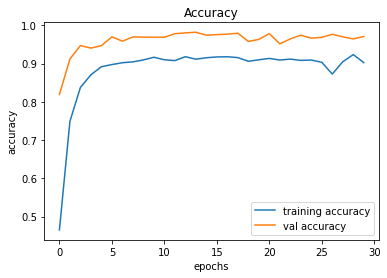

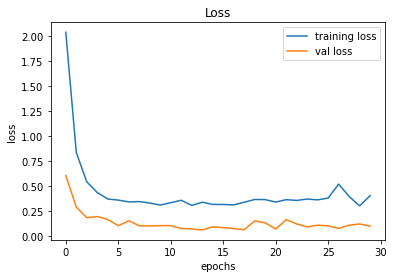

In [62]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [63]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 64)         

## Testing accuracy on test dataset

## Accuracy with the test data